# KNN WINE CLASSIFICATION

In [19]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix

In [20]:
wine = datasets.load_wine()

In [21]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]

In [22]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
df.shape

(178, 14)

In [24]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [25]:
df.duplicated().sum()

0

# TEST TRAIN SPLIT

In [26]:
x = df.drop(columns=['target'])
y = df["target"]

In [27]:
x.shape, y.shape

((178, 13), (178,))

In [28]:
y.unique()

array([0, 1, 2])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

In [30]:
x_train.shape

(142, 13)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
knn.score(x_test, y_test)

0.6388888888888888

# Tuning Sensitivity of Model

In [34]:
score = []
k_value = []
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    score.append(knn.score(x_test, y_test))
    k_value.append(k)
    

In [35]:
fig = px.line(x=k_value, y=score)
fig.update_xaxes(title_text='K Value')
fig.update_yaxes(title_text='Score')
fig.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8333333333333334

In [37]:
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [38]:
score = []
size=[]
for i in test_size:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=55)
    knn.fit(x_train, y_train)
    s = knn.score(x_test, y_test)
    score.append(s)
    size.append(i)

In [39]:
score

[0.7222222222222222,
 0.8333333333333334,
 0.7592592592592593,
 0.7222222222222222,
 0.7528089887640449,
 0.6542056074766355,
 0.68,
 0.6643356643356644,
 0.7142857142857143]

In [40]:
fig = px.line(x=size, y=score)
fig.update_xaxes(title_text='Test Size')
fig.update_yaxes(title_text='Score')
fig.show()

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8333333333333334

In [42]:
prediction = knn.predict(x_test)

In [43]:
prediction

array([0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2])

In [44]:
cm = confusion_matrix(y_test, prediction)
cm

array([[ 8,  0,  0],
       [ 0, 13,  2],
       [ 2,  2,  9]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

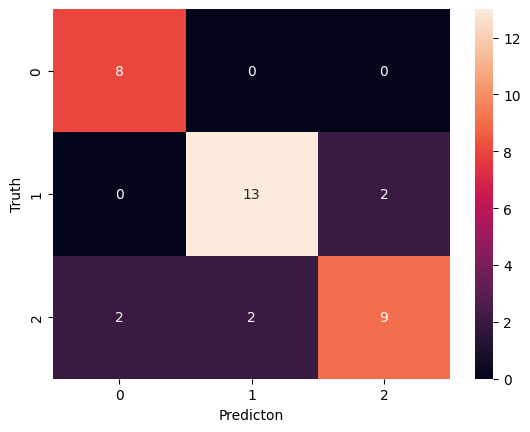

In [50]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicton")
plt.ylabel("Truth")